# ROOT (CMS) - like plots in matplotlib
## What would Jesus (ROOT) do
- Default ROOT font that is used is <span style="color:red">**called Helvetica, but it really uses Arial**</span>
- We should probably make sure whether we have the proper rights to use those fonts in the first place, since both Helvetica and Arial are proprietary
- At this point it is unclear to me which fonts are used by default in ROOT

## Fonts, Math-Fonts and Serifs
- Math fonts are a separate set from regular fonts due to the amount of special characters
- It's not trivial to make sure you get a matching math font to your regular font
- Most math-fonts are serif fonts for better readability, but this is not ideal if one wants to use sans-serif font like Arial
- The number of sans-serif math-fonts is very limited 
 - The number of **open** sans-serif math-fonts is extremely limited 
 
## What to do in matplotlib
- Use Arial as a default for both fonts to be consistent with typical ROOT output and TDR requirements
- Pursue either acquiring licenses for proprietary fonts, switching the open type fonts or commission a sans-font directly for use of CMS (or CERN)


In [80]:
import os
import matplotlib as mpl
# Copy fonts to fonts dir
os.system('cp fonts/* '+os.path.join(mpl.rcParams['datapath']+'/fonts/ttf/'))
# Copy styles to style dir
os.system('cp stylelib/* '+os.path.join(mpl.get_configdir()+'/stylelib/'))

0

## Styling
- Defaults are defined in an `rcParams` dictionary
- Ideally use rcParams and with.style.context()
```
with pyplot.style.context(['hep']):
    plotting...
```    
- but, this is buggy, doesn't seem to work properly for fonts
```
plt.style.use(['ROOT'])
```
### Available styles:
- `plt.style.use(['ROOT'])` - Default (figure 10x10 inches, full column size)
- `plt.style.use(['ROOTs'])` - Default (figure 6x6 inches, half column size)
- `plt.style.use(['ROOTs'])` - Default (figure 6x6 inches, half column size)
- `plt.style.use(['fira'])` - use Fira Sans (open typeface)
- `plt.style.use(['firamath'])` - use Fira Math (open typeface)
- `plt.style.use(['fabiola'])` - use Comic Sans

#### Styles can be chained:
- `plt.style.use(['ROOT', 'fira', 'firamath'])`

### Styling with LaTeX
- `plt.style.use(['ROOTtex'])` - Use LaTeX to produce all text labels
- Actual Helvetica if available as part of you tex-live distro
- Use sansmath as the math font
- Takes longer and not always better
- In general more possibilities, but more difficult to get it working properly


In [81]:
# To render with TeX use the following 
# plt.style.use(['ROOTtex'])
# Needs to install tex-live to have helvetica and use tex to render labels
# rcParams['text.latex.preamble'] = [
#        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#        r'\usepackage{helvet}',    # set the normal font here
#        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
# ]  
# rcParams['text.usetex'] = True

In [87]:
## Couple of styleing functions to be packages as a module at some point

In [88]:
def cms_annot(ax, paper=False, supplementary=False, data=False, year=2017, lumi=None, llabel=None, rlabel=None):
    from matplotlib import rcParams
    _font_size = rcParams['font.size']
    # CMS label    
    cms = ax.annotate('CMS', xy=(0.001, 1.015), xycoords='axes fraction', fontsize=_font_size*1.3, fontname='Arial',
                ha='left', fontweight='bold', annotation_clip=False)
    
    # Right label
    if rlabel != None:
        _lumi = rlabel
    else:
        if lumi != None:
            _lumi = r'{lumi}, {year} (13 TeV)'.format(lumi=str(lumi)+' $\mathrm{fb^{-1}}$', year=str(year))
        else: 
            _lumi = '{} (13 TeV)'.format(str(year))

    ax.annotate(_lumi, xy=(1, 1.015), xycoords='axes fraction', fontsize=_font_size, fontweight='normal', fontname='Arial',
            ha='right', annotation_clip=False)
    
    # Left label 
    if llabel != None:
        _label = llabel
    else:
        _label = ""
        if not data:
            _label = " ".join(["Simulation", _label])
        if not paper:
            _label = " ".join([_label, "Preliminary"])
        if supplementary:
            _label = " ".join([_label, "Supplementary"])    
        
        _label = " ".join(_label.split())            
    
    ax.annotate(_label, xy=(0.001, 1.015), xycoords='axes fraction', fontsize=_font_size, fontname='Arial', 
                xytext=(cms.get_window_extent(renderer=f.canvas.get_renderer()).width, 0), textcoords='offset points',
                fontstyle='italic', ha='left', annotation_clip=False)
    return ax

def cms_ticks(ax):
    import matplotlib.ticker as plticker
    xl = ax.get_xlim()
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/10))
    ax.xaxis.set_minor_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/40))
    yl = ax.get_ylim()
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/10))
    ax.yaxis.set_minor_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/40))

    return ax
    

In [92]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.style.reload_library()
#plt.style.use(['ROOT', 'firamath'])
plt.style.use(['ROOT'])

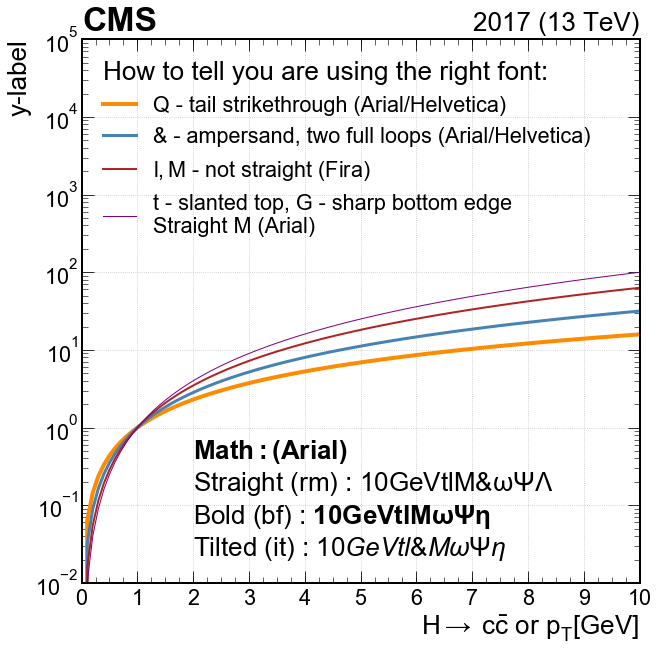

In [93]:
import numpy as np
C = ['darkorange', 'steelblue', 'firebrick', 'purple']

# Figure
f, ax = plt.subplots()

# Make some data
x = np.linspace(0,10,101)
y0 = x**(1.2)
y1 = x**(1.5)
y2 = x**(1.8)
y3 = x**(2)

ax.plot(x, y0, lw=4, label=r"Q - tail strikethrough (Arial/Helvetica) ", c=C[0])
ax.plot(x, y1, lw=3, label=r"& - ampersand, two full loops (Arial/Helvetica)", c=C[1])
ax.plot(x, y2, lw=2, label=r"$\mathrm{l, M}$ - not straight (Fira)", c=C[2])
ax.plot(x, y3, lw=1, label=r"t - slanted top, G - sharp bottom edge" "\n" r"Straight M (Arial)", c=C[3])

# Set limits and labels
ax.set_xlim(0,10)
ax.set_ylim(0.01,100000)
ax.set_xlabel(r'$\mathrm{H \rightarrow\ c\bar{c}}$ or $\mathrm{p_T [GeV]}$', ha='right', x=1.0)
ax.set_ylabel('y-label', ha='right', y=1.0)

# Legend
leg = ax.legend(borderpad=0.5, frameon=False, loc=2)
leg.set_title('How to tell you are using the right font:')
leg._legend_box.align = "left" # Align legend title

# Annotationg and math examples
math_desc =  r"$\mathbf{Math: (Arial)}$" \
      + "\n" +r"Straight (rm) : $\mathrm{10GeVtlM&\omega\Psi\Lambda}$" \
      + "\n" +r"Bold (bf) : $\mathbf{10GeVtlM\omega\Psi\eta}$" \
      + "\n" +r"Tilted (it) : $\mathit{10GeVtl&M\omega\Psi\eta}$" 
ax.annotate(math_desc, xy=(0.2, 0.05), xycoords='axes fraction', fontweight='normal',
             ha='left', annotation_clip=False)

# Apply CMS labels and ticks
#ax = annot(ax, data=True, lumi=2.5)
ax = cms_annot(ax, llabel="")
ax = cms_ticks(ax)

ax.grid()
ax.semilogy()
f.show()
